*Problem Identification*
Given factors that include the legal issue and the idenitity of the Supreme Court Justice, this project will model and predict how each Justice will vote on future legal issues. The vote by the Supreme Court Justice is a target variable. This model may guide law firms and public policy groups in making litigation decisions. Citation to the database: Harold J. Spaeth, Lee Epstein, et al. 2022 Supreme Court Database, Version 2022 Release 1. URL: http://Supremecourtdatabase.org 


In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [2]:
df = pd.read_csv('SCDB_2021_01_justiceCentered_LegalProvision.csv')


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122088 entries, 0 to 122087
Data columns (total 61 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   caseId                    122088 non-null  object 
 1   docketId                  122088 non-null  object 
 2   caseIssuesId              122088 non-null  object 
 3   voteId                    122088 non-null  object 
 4   dateDecision              122088 non-null  object 
 5   decisionType              122088 non-null  int64  
 6   usCite                    117561 non-null  object 
 7   sctCite                   122088 non-null  object 
 8   ledCite                   122072 non-null  object 
 9   lexisCite                 122088 non-null  object 
 10  term                      122088 non-null  int64  
 11  naturalCourt              122088 non-null  int64  
 12  chief                     122088 non-null  object 
 13  docket                    121809 non-null  o

*This step selects the columns that are relevant to the analysis and limited to cases ruled on by Justice Roberts, who is considered a "swing vote" in many Supreme Court cases and now has additional significance as the current Chief Justice. I have decided to narrow the project to predicting Justice Robert's votes first, with additional analysis to be included later.

In [4]:
cols_to_subset = ['caseId','sctCite', 'caseName', 'chief', 'issue', 'issueArea', 'decisionDirection', 'authorityDecision1','lawType', 'lawSupp', 'lawMinor', 'partyWinning', 'precedentAlteration', 'splitVote', 'majVotes', 'minVotes', 'justice', 'justiceName', 'vote', 'opinion', 'direction', 'majority']

In [5]:
df = df[cols_to_subset]

In [6]:
df = df[df['justiceName'] == 'JGRoberts']

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527 entries, 108450 to 122079
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseId               1527 non-null   object 
 1   sctCite              1527 non-null   object 
 2   caseName             1527 non-null   object 
 3   chief                1527 non-null   object 
 4   issue                1523 non-null   float64
 5   issueArea            1523 non-null   float64
 6   decisionDirection    1522 non-null   float64
 7   authorityDecision1   1501 non-null   float64
 8   lawType              1492 non-null   float64
 9   lawSupp              1492 non-null   float64
 10  lawMinor             409 non-null    object 
 11  partyWinning         1526 non-null   float64
 12  precedentAlteration  1527 non-null   float64
 13  splitVote            1527 non-null   int64  
 14  majVotes             1527 non-null   int64  
 15  minVotes             1527 non-n

In [8]:
df.tail(10)

,caseId,sctCite,caseName,chief,issue,issueArea,decisionDirection,authorityDecision1,lawType,lawSupp,...,precedentAlteration,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
121998,2020-066,141 S. Ct. 1858,TERRY v. UNITED STATES,Roberts,10510.0,1.0,1.0,4.0,6.0,600.0,...,0.0,1,9,0,111,JGRoberts,1.0,1.0,1.0,2.0
122007,2020-067,141 S. Ct. 2090,GREER v. UNITED STATES,Roberts,10040.0,1.0,1.0,4.0,4.0,401.0,...,0.0,1,9,0,111,JGRoberts,1.0,1.0,1.0,2.0
122016,2020-067,141 S. Ct. 2090,UNITED STATES v. GARY,Roberts,10040.0,1.0,1.0,4.0,4.0,401.0,...,0.0,1,8,1,111,JGRoberts,1.0,1.0,1.0,2.0
122025,2020-068,141 S. Ct. 2244,PENNEAST PIPELINE CO. v. NEW JERSEY,Roberts,40070.0,4.0,2.0,1.0,2.0,211.0,...,0.0,1,5,4,111,JGRoberts,1.0,2.0,2.0,2.0
122034,2020-068,141 S. Ct. 2244,PENNEAST PIPELINE CO. v. NEW JERSEY,Roberts,80310.0,8.0,2.0,4.0,3.0,355.0,...,0.0,1,5,4,111,JGRoberts,1.0,2.0,2.0,2.0
122043,2020-070,141 S. Ct. 1145,"MAYS, WARDEN v. HINES",Roberts,10020.0,1.0,1.0,4.0,3.0,341.0,...,0.0,1,8,1,111,JGRoberts,1.0,1.0,1.0,2.0
122052,2020-071,141 S. Ct. 1467,ALASKA v. WRIGHT,Roberts,10020.0,1.0,1.0,4.0,3.0,341.0,...,0.0,1,9,0,111,JGRoberts,1.0,1.0,1.0,2.0
122061,2020-072,141 S. Ct. 2405,DUNN v. REEVES,Roberts,10020.0,1.0,1.0,3.0,3.0,341.0,...,0.0,1,6,3,111,JGRoberts,1.0,1.0,1.0,2.0
122070,2020-073,141 S. Ct. 2226,PAKDEL v. CITY AND COUNTY OF SAN FRANCISCO,Roberts,40070.0,4.0,1.0,2.0,2.0,211.0,...,0.0,1,9,0,111,JGRoberts,1.0,1.0,1.0,2.0
122079,2020-074,141 S. Ct. 2239,LOMBARDO v. ST. LOUIS,Roberts,40040.0,4.0,2.0,3.0,2.0,207.0,...,0.0,1,6,3,111,JGRoberts,1.0,1.0,2.0,2.0


In [9]:
df.shape

(1527, 22)

In [10]:
df['issue'].value_counts().sort_index()

10010.0      1
10020.0     64
10030.0      3
10040.0     10
10050.0     38
            ..
130020.0     3
140010.0     1
140030.0     1
140060.0     2
140070.0     1
Name: issue, Length: 182, dtype: int64

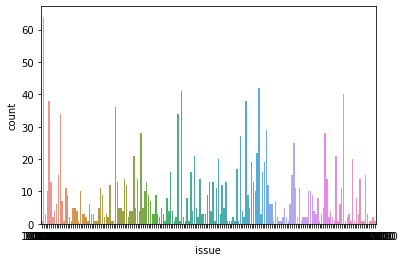

In [11]:
sns.countplot(data=df, x='issue')
plt.show()

*issue values are described in the code book as representing specific areas of law: http://scdb.wustl.edu/documentation.php?var=issue. In future versions of this project, it may help to attach a label to the issue values.

In [12]:
df['issueArea'].value_counts().sort_index()

1.0     378
2.0     251
3.0     101
4.0      45
5.0      29
6.0      23
7.0      36
8.0     321
9.0     210
10.0     78
11.0     12
12.0     16
13.0     18
14.0      5
Name: issueArea, dtype: int64

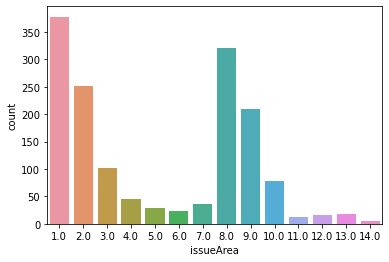

In [13]:
sns.countplot(data=df, x='issueArea')
plt.show()

*issueArea variable represents a legal issue category and is listed here as including numbers 1 through 14: http://scdb.wustl.edu/documentation.php?var=issueArea

NOTE: The "substantive variables" described in the code book should be explored as possible feature variables as well. Most, if not all, of the variables in this data are categorical, including the target variable of how a Justice votes on a particular case (for or against): http://scdb.wustl.edu/documentation.php?